<a href="https://colab.research.google.com/github/Farmhouse121/Financial-Data-Science-in-Python/blob/main/Miscellaneous/Longer_Term_Crypto_Degrees_of_Freedom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from my_library import *

16:22:19 Starting...
16:22:19 Installing yfinance into Google notebook...
16:22:26 Installing arch into Google notebook...
16:22:40 Initialized.


In [2]:
try:
    from google.colab import drive
    drive.mount("/content/drive")
    nprint("Mounted Google Drive.")

except:
    raise

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
16:22:41 Mounted Google Drive.


In [3]:
data=pd.read_table('https://s3.amazonaws.com/public.gillerinvestments.com/crypto_returns.txt',header=[0, 1],skiprows=[2],sep='\\s+',engine='python',parse_dates=True)
data.columns=data.columns.droplevel(1)
data.index=pd.DatetimeIndex(data.index).to_period('D')
data.index.name='UTC Date'
data.columns.name='Return (%)'
data=data[sorted(data.columns)].copy()
data.drop(data.index[-1],inplace=True) # remove the final row in case it is not complete
data.drop(data.index[data.index<(fd:='2024-07-31')],inplace=True) # remove data before 2024-07-31
data=data[data.columns[data.apply(lambda x:x.first_valid_index())<=fd]] # remove newly added tickers after 2024-07-31
display(data)

Return (%),AAVE-USD,AVAX-USD,BCH-USD,BTC-USD,COMP-USD,DOGE-USD,ETC-USD,ETH-USD,LINK-USD,LTC-USD,SHIB-USD,UNI-USD,XLM-USD,XTZ-USD
UTC Date,,,,,,,,,,,,,,
2024-07-31,2.001567,-2.358840,-4.200110,-2.365537,-0.047707,-2.837462,-2.073961,-1.452662,-2.375695,-2.164731,-6.382353,-3.024153,-1.936113,-2.775783
2024-08-01,8.726297,0.036957,-0.288448,1.151609,1.518046,-2.302137,-0.996922,-0.871557,0.491381,-0.799247,-0.816839,0.230222,-1.248259,-0.608589
2024-08-02,-5.610969,-8.265604,-7.564218,-6.025579,-4.053610,-6.341034,-6.167053,-6.727354,-7.544241,-6.546150,-7.190371,-8.025336,-3.852546,-5.256278
2024-08-03,-4.481945,-3.931834,-4.592054,-1.198185,-13.779336,-3.094934,-2.771871,-2.837828,-1.918234,-0.578258,-2.866894,0.234600,-2.236539,-0.486530
2024-08-04,-7.831497,-6.321154,-8.886479,-4.229510,-7.939911,-4.046256,-3.804583,-7.507444,-6.932854,-3.440406,-6.289529,-7.255568,-5.467211,-3.531816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-13,2.885392,-0.654629,0.455827,1.465332,-1.606863,0.834839,0.595289,0.740612,-0.453065,4.509417,1.529161,-1.191935,3.082166,-0.161812
2024-12-14,-3.166281,-5.572415,-1.621923,-0.080148,-3.965322,-2.699066,-4.318509,-1.041476,0.218135,-5.153729,-3.695271,-4.221366,-3.207810,-4.593902
2024-12-15,0.581898,1.506929,2.119001,2.936580,2.733929,1.884138,3.446892,2.184033,0.231968,2.336014,1.291144,1.598662,1.272279,6.553838


Return (%),AAVE-USD,AVAX-USD,BCH-USD,BTC-USD,COMP-USD,DOGE-USD,ETC-USD,ETH-USD,LINK-USD,LTC-USD,SHIB-USD,UNI-USD,XLM-USD,XTZ-USD
Return (%),,,,,,,,,,,,,,
AAVE-USD,1.000000,0.602649,0.520913,0.469599,0.596566,0.294059,0.616747,0.651221,0.632081,0.374402,0.371699,0.700171,0.127494,0.351385
AVAX-USD,0.602649,1.000000,0.645302,0.664599,0.721893,0.578326,0.707924,0.678954,0.803605,0.580055,0.606130,0.613572,0.300404,0.485413
BCH-USD,0.520913,0.645302,1.000000,0.771396,0.508340,0.638358,0.779235,0.782222,0.581525,0.592554,0.628843,0.681343,0.336704,0.546012
BTC-USD,0.469599,0.664599,0.771396,1.000000,0.491196,0.758536,0.661366,0.803778,0.543014,0.524918,0.659647,0.607399,0.201860,0.434177
COMP-USD,0.596566,0.721893,0.508340,0.491196,1.000000,0.422076,0.702041,0.606812,0.641812,0.462938,0.539621,0.561526,0.273568,0.470105
DOGE-USD,0.294059,0.578326,0.638358,0.758536,0.422076,1.000000,0.536171,0.596286,0.403046,0.430201,0.769899,0.453123,0.273790,0.357627
ETC-USD,0.616747,0.707924,0.779235,0.661366,0.702041,0.536171,1.000000,0.809554,0.647835,0.662592,0.647504,0.759564,0.481806,0.572507
ETH-USD,0.651221,0.678954,0.782222,0.803778,0.606812,0.596286,0.809554,1.000000,0.630638,0.548922,0.607341,0.725469,0.234293,0.495240
LINK-USD,0.632081,0.803605,0.581525,0.543014,0.641812,0.403046,0.647835,0.630638,1.000000,0.576797,0.416910,0.654896,0.284961,0.504168


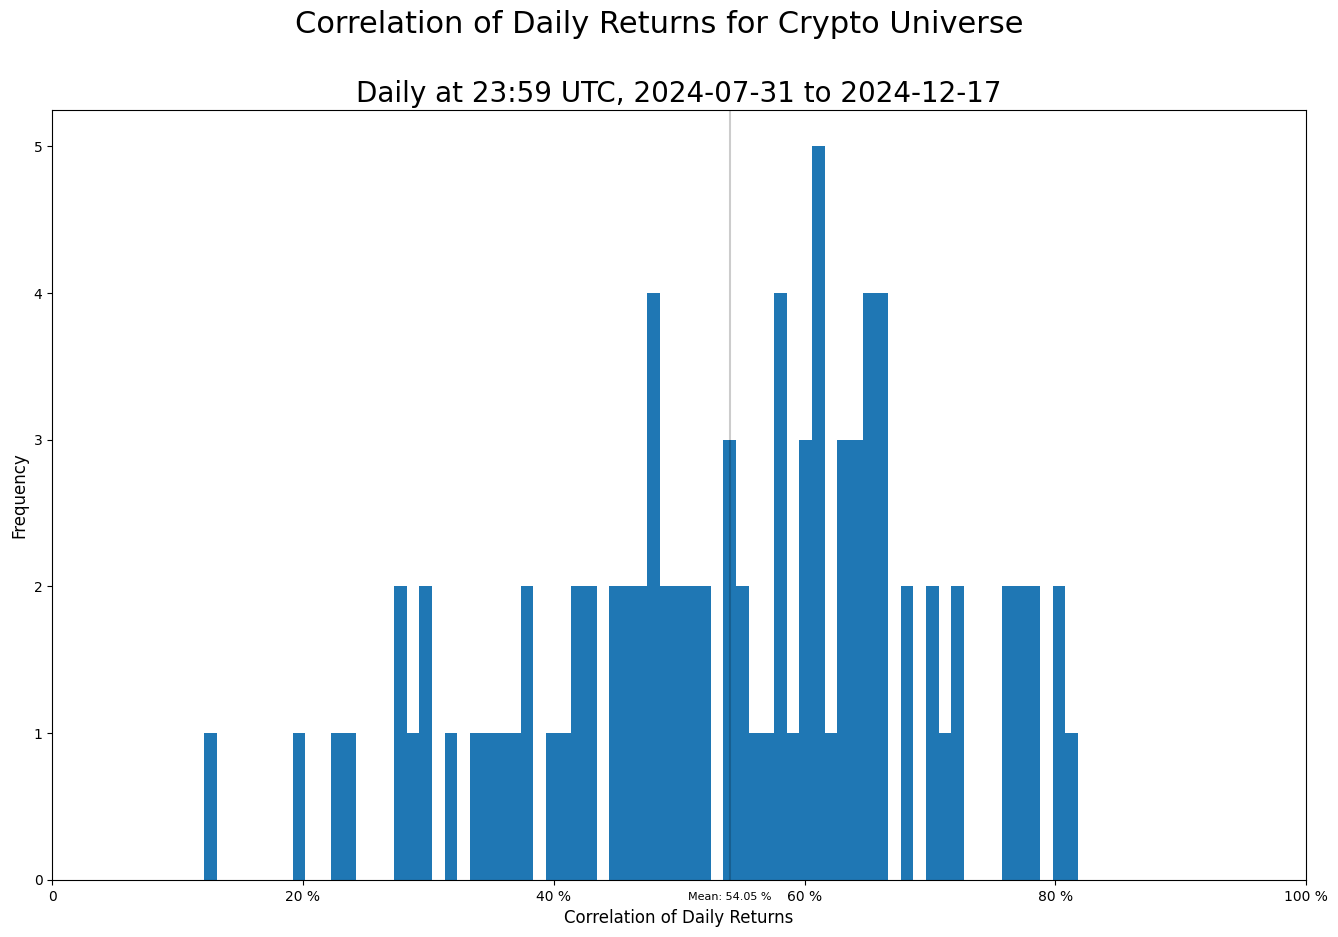

In [4]:
display(rho:=data.corr())
samples=pd.DataFrame({"row":[],"column":[],"correlation":[]}).set_index(["row","column"])

for i in range(rho.shape[0]):
    for j in range(i+1,rho.shape[0]):
        samples.loc[(rho.index[i],rho.columns[j]),"correlation"]=rho.iloc[i,j]*hundred

figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
counts,bins,patches=plot.hist(samples['correlation'],bins=np.linspace(zero,hundred,100))
plot.set_xlabel("Correlation of Daily Returns",fontsize=12)
plot.xaxis.set_major_formatter(PercentLabels(0))
plot.set_ylabel("Frequency",fontsize=12)
plot.yaxis.set_major_formatter(CountLabels(0))
plot.set_title(subtitle:="Daily at 23:59 UTC, %s to %s" % (data.index[0],data.index[-1]),fontsize=20)
plot.set_xlim(zero,hundred)
plot.axvline(m:=samples['correlation'].mean(),color='black',alpha=0.2)
plot.text(m,zero,"\nMean: {:.2f} %".format(m),ha='center',va='top',fontsize=8)
figure.suptitle(title:="Correlation of Daily Returns for Crypto Universe",fontsize=22)
figure.savefig((filepath:='/content/drive/MyDrive/')+title+(filetype:='.pdf'),dpi=300,bbox_inches='tight')

In [5]:
if 'random_seed' not in locals():
    random_seed=12345678 # don't reset the seed multiple times in one session

if random_seed is not None:
    generator=np.random.default_rng(seed=random_seed)
    nprint("Using NumPy random seed %d." % random_seed)
    random_seed=None

else:
    nprint("Continuing random sequence from prior seed.")

16:22:44 Using NumPy random seed 12345678.


In [6]:
results=pd.DataFrame({"Sample":range(1,(n:=1000)+1),"Assets":[np.nan]*n,"Portfolio":[np.nan]*n,"Coins":[""]*n}).set_index("Sample") # n is number of trials
nprint("Beginning analysis for {:,d} trials.".format(n))

for i in tqdm(results.index): # for each trial, pick a random sample of stocks with portfolio sizes uniformly distributed between 1 and maximum, one of 2^503-1 choices
    returns=pd.DataFrame()

    for ticker in data[generator.choice(data.columns,generator.integers(1,data.shape[1]+1),replace=False)]:
        returns[ticker]=data[ticker]
        returns=returns.copy() # 'cos it frags, apparently

    results.loc[i,"Coins"]=",".join(sorted(map(lambda x:x.split('-')[0],returns.columns))) # list of coins in portfolio
    returns['Portfolio']=returns.mean(axis=1) # equal weighted portfolio return
    select=returns["Portfolio"]>zero if filter=="Up" else returns["Portfolio"]<zero if filter=="Down" else ~returns["Portfolio"].isna()
    results.loc[i,"Assets"]=returns.shape[1]-1 # number of assets we ended up with
    results.loc[i,"Independent"]=returns.loc[select,[a for a in returns if a!="Portfolio"]].var().sum()/results.loc[i,"Assets"]**2 # if no correlation, portfolio variance is total variance divided by square of number of assets
    results.loc[i,"Portfolio"]=returns.loc[select,'Portfolio'].var() # variance of portfolio returns for same period as individual returns

results.dropna(inplace=True)
results.drop_duplicates(inplace=True)
results["Effective D.o.F."]=results["Independent"]/results["Portfolio"]*results["Assets"]
display(results)
nprint("Done.")

16:22:44 Beginning analysis for 1,000 trials.


  0%|          | 0/1000 [00:00<?, ?it/s]

,Assets,Portfolio,Coins,Independent,Effective D.o.F.
Sample,,,,,
1,14.0,14.341428,"AAVE,AVAX,BCH,BTC,COMP,DOGE,ETC,ETH,LINK,LTC,S...",1.979716,1.932584
2,9.0,14.254554,"AAVE,AVAX,BTC,ETH,LINK,LTC,SHIB,UNI,XLM",3.105757,1.960904
3,8.0,15.723516,"COMP,DOGE,ETH,LTC,SHIB,UNI,XLM,XTZ",3.983695,2.026872
4,7.0,15.268386,"BCH,ETH,LINK,LTC,SHIB,UNI,XTZ",3.710440,1.701102
5,10.0,14.502164,"AAVE,AVAX,BCH,BTC,COMP,DOGE,ETH,SHIB,UNI,XLM",2.817104,1.942541
...,...,...,...,...,...
996,7.0,18.519741,"AAVE,AVAX,COMP,DOGE,LINK,SHIB,XTZ",4.549243,1.719500
997,12.0,14.190011,"AAVE,BCH,BTC,COMP,DOGE,ETC,ETH,LINK,LTC,SHIB,U...",2.101928,1.777527
998,8.0,14.237286,"BCH,BTC,ETC,LTC,SHIB,UNI,XLM,XTZ",3.451884,1.939630


16:23:10 Done.


In [7]:
from statsmodels.api import OLS,add_constant
Nmin,Nmax=five,results["Assets"].max()-one
design=results[select:=(results["Assets"]>=Nmin)&(results["Assets"]<=Nmax)][[yn:="Effective D.o.F.",xn:="Assets"]].drop_duplicates()
model=OLS(design[yn],add_constant(design[xn])).fit()
nprint(model.summary())
nprint("Implied regression factor count: {:.2f} +/- {:.2g} for data in [{:,.0f},{:,.0f}].".format(Kreg:=one/model.params.iloc[1],model.bse.iloc[1]/model.params.iloc[1]**4,Nmin,Nmax))
final=results[results[xn]==results[xn].max()].drop_duplicates(xn)
Nstar,Nact=tuple(final.iloc[-1][[yn,xn]])
rho=(Nact-Nstar)/((Nact-one)*Nstar)
nprint("Effective D.o.F. Limit {:,.2f}, Implied Correlation {:.2f} %.".format(Nstar,rho*hundred))
Khat=Nact/Nstar
nprint("Implied limiting factor count: {:.0f}.".format(Khat))

16:23:11                             OLS Regression Results                            
Dep. Variable:       Effective D.o.F.   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     83.76
Date:                Wed, 18 Dec 2024   Prob (F-statistic):           8.97e-19
Time:                        16:23:11   Log-Likelihood:                 265.32
No. Observations:                 594   AIC:                            -526.6
Df Residuals:                     592   BIC:                            -517.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6390      0.023     72.143

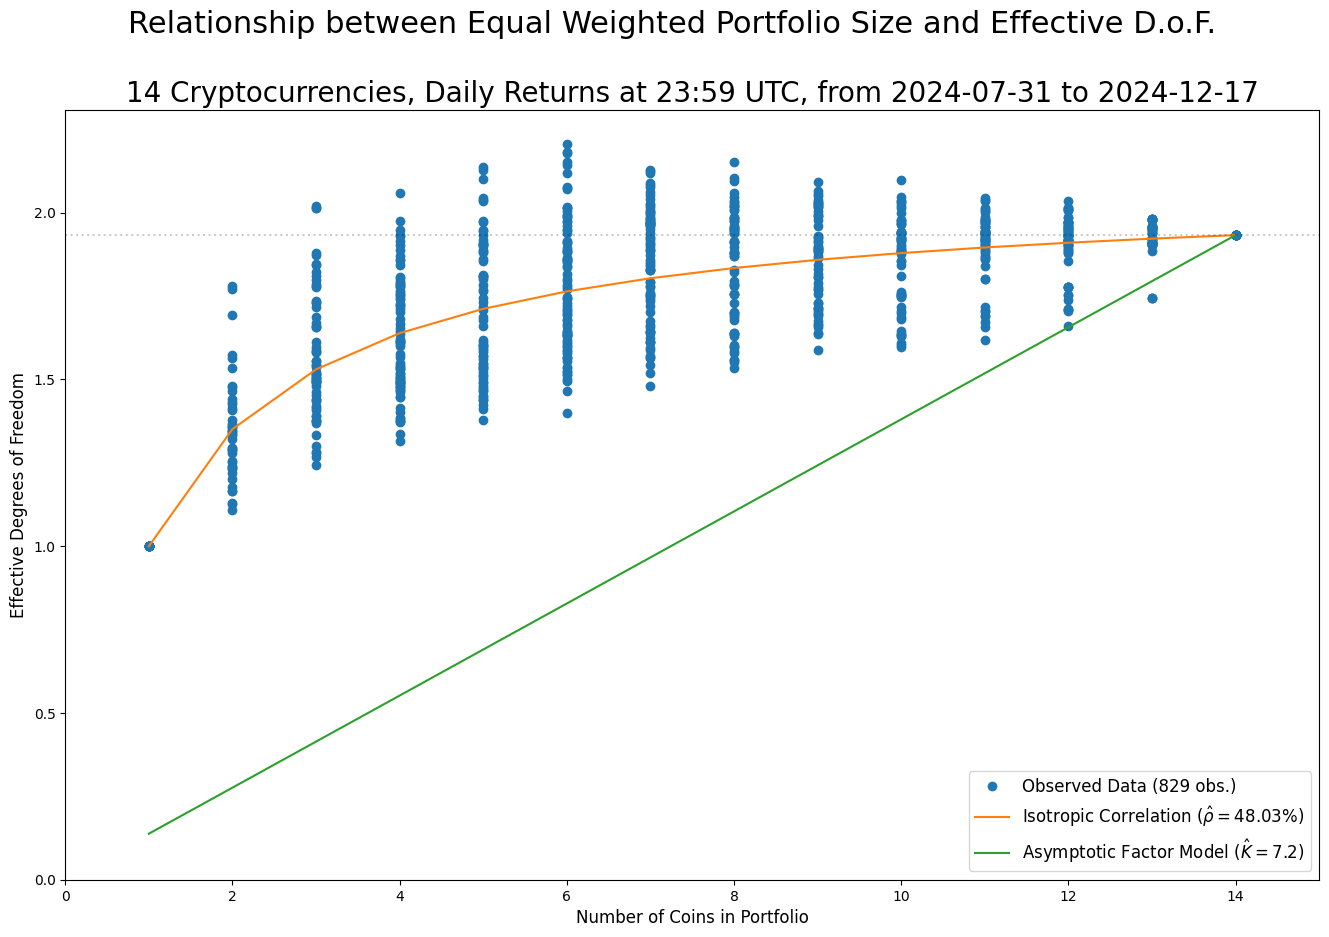

In [8]:
figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.plot(x:=results["Assets"].to_numpy(),y:=results["Effective D.o.F."].to_numpy(),'o',label='Observed Data (%d obs.)' % results.shape[0])
plot.plot(xp:=np.unique(np.sort(x)),xp/(one+(xp-one)*rho),'-',label='Isotropic Correlation ($\\hat{\\rho} = %.2f$%%)' % (rho*hundred))
plot.plot(xp,xp/Khat,'-',label="Asymptotic Factor Model ($\\hat{K} = %.1f$)" % Khat)
#plot.plot(xpp:=np.arange(Nmin,Nmax+one),model.params.iloc[0]+model.params.iloc[1]*xpp,'-',label="Regression Linear Model ($\\hat{K} = %.1f$)" % Kreg)
plot.set_xscale('log' if max(x)>100 else 'linear')
plot.set_ylim(zero,None)
plot.set_xlabel("Number of Coins in Portfolio",fontsize=12)
plot.set_ylabel("Effective Degrees of Freedom",fontsize=12)
figure.suptitle(title:="Relationship between Equal Weighted Portfolio Size and Effective D.o.F.",fontsize=22)
plot.set_title(subtitle:="%d Cryptocurrencies, Daily Returns at 23:59 UTC, from %s to %s" % (data.shape[1],data.index[0],data.index[-1]),fontsize=20)
plot.set_xlim(zero,Nmax+two)
plot.legend(fontsize=12)
plot.axhline(Nstar,color='black',linestyle=':',alpha=0.2)
plot.xaxis.set_major_formatter(CountLabels())
figure.savefig(filepath+title+filetype,dpi=300,bbox_inches='tight')

16:23:12 Isotropic Model: Total Chi Squared 12.1208 for 12 d.o.f., p Value = 0.436028.
16:23:12 Factor Model: Total Chi Squared 19.2214 for 7 d.o.f., p Value = 0.00752138.


Mean   St.Dev. Sample  Std.Err. Isotropic                      \
                                                Model     Error   Z Score   
Assets                                                                      
1.0     1.000000  0.000000     14  0.000000  1.000000  0.000000       NaN   
2.0     1.352110  0.157870     44  0.023800  1.351057  0.001053  0.044234   
3.0     1.570895  0.188933     66  0.023256  1.530110  0.040785  1.753759   
4.0     1.630236  0.175519     80  0.019624  1.638696 -0.008460 -0.431097   
5.0     1.703905  0.205080     71  0.024338  1.711574 -0.007669 -0.315086   
6.0     1.783136  0.196050     89  0.020781  1.763871  0.019265  0.927040   
7.0     1.845687  0.168249     82  0.018580  1.803226  0.042461  2.285328   
8.0     1.842867  0.165703     69  0.019948  1.833914  0.008952  0.448776   
9.0     1.859782  0.137177     59  0.017859  1.858515  0.001267  0.070955   
10.0    1.856334  0.133481     61  0.017090  1.878676 -0.022342 -1.307267   
11.0    1.903004  0.099038     63  0.012478  1.895499  0.007505  0.601447   
12.0    1.903758  0.089130     68  0.010809  1.909751 -0.005993 -0.554473   
13.0    1.924361  0.054603     48  0.007881  1.921978  0.002382  0.302260   

                    Factor                                
         Chi Sq.     Model     Error   Z Score   Chi Sq.  
Assets                                                    
1.0          NaN       NaN       NaN       NaN       NaN  
2.0     0.001957       NaN       NaN       NaN       NaN  
3.0     3.075669       NaN       NaN       NaN       NaN  
4.0     0.185845       NaN       NaN       NaN       NaN  
5.0     0.099279  1.755501 -0.051596 -2.119929  4.494097  
6.0     0.859403  1.778795  0.004341  0.208886  0.043633  
7.0     5.222722  1.802089  0.043599  2.346531  5.506206  
8.0     0.201400  1.825383  0.017484  0.876469  0.768198  
9.0     0.005035  1.848677  0.011106  0.621860  0.386709  
10.0    1.708947  1.871970 -0.015636 -0.914912  0.837065  
11.0    0.361738  1.895264  0.007740  0.620295  0.384765  
12.0    0.307440  1.918558 -0.014800 -1.369304  1.874992  
13.0    0.091361  1.941852 -0.017492 -2.219398  4.925725

16:23:12 F Test for Equivalence of Descriptions: F(7,12) = 2.71855, p Value = 0.123068.


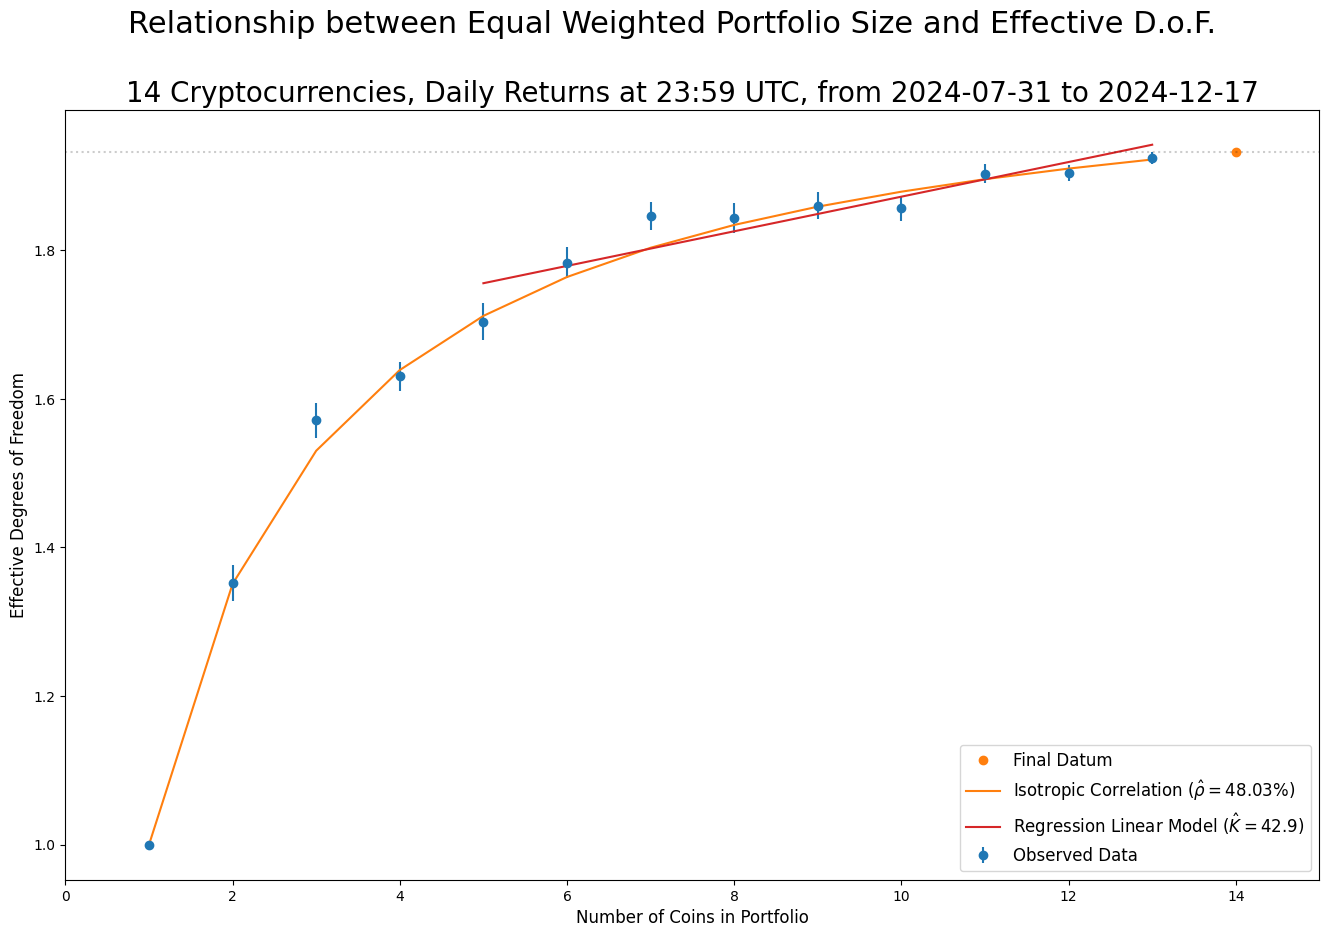

In [9]:
from scipy.stats import chi2,f as fdensity
meta=pd.DataFrame()
meta["Mean"]=(g:=results[(results["Assets"]<=Nmax)][["Assets","Effective D.o.F."]].groupby("Assets")).mean()
meta["St.Dev."]=g.std()
meta["Sample"]=g.count()
meta["Std.Err."]=meta["St.Dev."]/meta["Sample"]**0.5
meta[(l:="Isotropic","Model")]=(x:=meta.index)/(one+(x-one)*rho)
meta[(l,"Error")]=meta["Mean"]-meta[(l,"Model")]
meta[(l,"Z Score")]=meta[(l,"Error")]/meta["Std.Err."]
meta[(l,"Chi Sq.")]=meta[(l,"Z Score")]**2
nprint("%s Model: Total Chi Squared %g for %d d.o.f., p Value = %g." % (l,sc21:=meta[(l,"Chi Sq.")].sum(),df1:=meta[(l,'Chi Sq.')].count(),chi2(df1).sf(sc21)))
meta[(l:="Factor","Model")]=list(map(lambda x:model.params.iloc[0]+model.params.iloc[1]*x if x>=Nmin and x<=Nmax else np.nan,meta.index))
meta[(l,"Error")]=meta["Mean"]-meta[(l,"Model")]
meta[(l,"Z Score")]=meta[(l,"Error")]/meta["Std.Err."]
meta[(l,"Chi Sq.")]=meta[(l,"Z Score")]**2
nprint("%s Model: Total Chi Squared %g for %d d.o.f., p Value = %g." % (l,sc22:=meta[(l,"Chi Sq.")].sum(),df2:=meta[(l,'Chi Sq.')].count()-len(model.params),chi2(df2).sf(sc22)))
meta.columns=pd.MultiIndex.from_tuples(list(map(lambda x:x if type(x)==tuple else (x,''),meta.columns)))
display(meta)

nprint("F Test for Equivalence of Descriptions: F(%d,%d) = %g, p Value = %g." % (df2,df1,(f:=(sc22/df2)/(sc21/df1)),two*min([fdensity(df2,df1).sf(f),fdensity(df2,df1).cdf(f)])))

figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.errorbar(x=meta.index,y=meta["Mean"],yerr=meta["Std.Err."],fmt='o',label='Observed Data')
plot.plot([Nact],[Nstar],'o',label='Final Datum',color='C1')
plot.plot(x,z:=meta[("Isotropic","Model")],'-',label='Isotropic Correlation ($\\hat{\\rho} = %.2f$%%)' % (rho*hundred),color='C1')
plot.plot(xp:=np.arange(Nmin,Nmax+one),model.params.iloc[0]+model.params.iloc[1]*xp,'-',label="Regression Linear Model ($\\hat{K} = %.1f$)" % Kreg,color='C3')
plot.set_xscale('log' if max(x)>100 else 'linear')
plot.set_xlabel("Number of Coins in Portfolio",fontsize=12)
plot.set_ylabel("Effective Degrees of Freedom",fontsize=12)
figure.suptitle(title,fontsize=22)
plot.set_title(subtitle,fontsize=20)
plot.set_xlim(zero,Nmax+two)
plot.legend(fontsize=12)
plot.axhline(Nstar,color='black',linestyle=':',alpha=0.2)
plot.xaxis.set_major_formatter(CountLabels())
figure.savefig(filepath+title+" 2"+filetype,dpi=300,bbox_inches='tight')

16:23:13 Isotropic Model: Total Chi Squared 12.1208 for 12 d.o.f., p Value = 0.436028.
16:23:13 Fitted linear factor model curve via NLLS: b2bar = 5.05745e-14 ± 0.186425, bbar2 = 7.14205 ± 9.03423e+06, s2bar = 17.1862 ± 2.17394e+07. K* = 7.08123e-15
16:23:13 Factor Model: Total Chi Squared 623.013 for 9 d.o.f., p Value = 2.40332e-128.


Sample                           Isotropic                      \
            Mean   St.Dev. Count  Std.Err.     Model     Error   Z Score   
Assets                                                                     
1.0     1.000000  0.000000    14  0.000000  1.000000  0.000000       NaN   
2.0     1.352110  0.157870    44  0.023800  1.351057  0.001053  0.044234   
3.0     1.570895  0.188933    66  0.023256  1.530110  0.040785  1.753759   
4.0     1.630236  0.175519    80  0.019624  1.638696 -0.008460 -0.431097   
5.0     1.703905  0.205080    71  0.024338  1.711574 -0.007669 -0.315086   
6.0     1.783136  0.196050    89  0.020781  1.763871  0.019265  0.927040   
7.0     1.845687  0.168249    82  0.018580  1.803226  0.042461  2.285328   
8.0     1.842867  0.165703    69  0.019948  1.833914  0.008952  0.448776   
9.0     1.859782  0.137177    59  0.017859  1.858515  0.001267  0.070955   
10.0    1.856334  0.133481    61  0.017090  1.878676 -0.022342 -1.307267   
11.0    1.903004  0.099038    63  0.012478  1.895499  0.007505  0.601447   
12.0    1.903758  0.089130    68  0.010809  1.909751 -0.005993 -0.554473   
13.0    1.924361  0.054603    48  0.007881  1.921978  0.002382  0.302260   

                    Factor                                   
         Chi Sq.     Model     Error    Z Score     Chi Sq.  
Assets                                                       
1.0          NaN  0.706429  0.293571        NaN         NaN  
2.0     0.001957  1.092216  0.259894  10.920012  119.246656  
3.0     3.075669  1.335286  0.235609  10.131089  102.638972  
4.0     0.185845  1.502472  0.127764   6.510707   42.389309  
5.0     0.099279  1.624511  0.079394   3.262076   10.641142  
6.0     0.859403  1.717515  0.065620   3.157675    9.970912  
7.0     5.222722  1.790745  0.054943   2.957085    8.744350  
8.0     0.201400  1.849900 -0.007033  -0.352574    0.124309  
9.0     0.005035  1.898683 -0.038901  -2.178227    4.744674  
10.0    1.708947  1.939602 -0.083268  -4.872157   23.737916  
11.0    0.361738  1.974416 -0.071412  -5.723192   32.754927  
12.0    0.307440  2.004397 -0.100639  -9.311012   86.694949  
13.0    0.091361  2.030486 -0.106126 -13.465696  181.324963

16:23:13 Wrote meta data to '/content/drive/MyDrive/meta.tex.'
16:23:13 F Test for Equivalence of Descriptions: F(9,12) = 68.5338, p Value = 1.23403e-08.


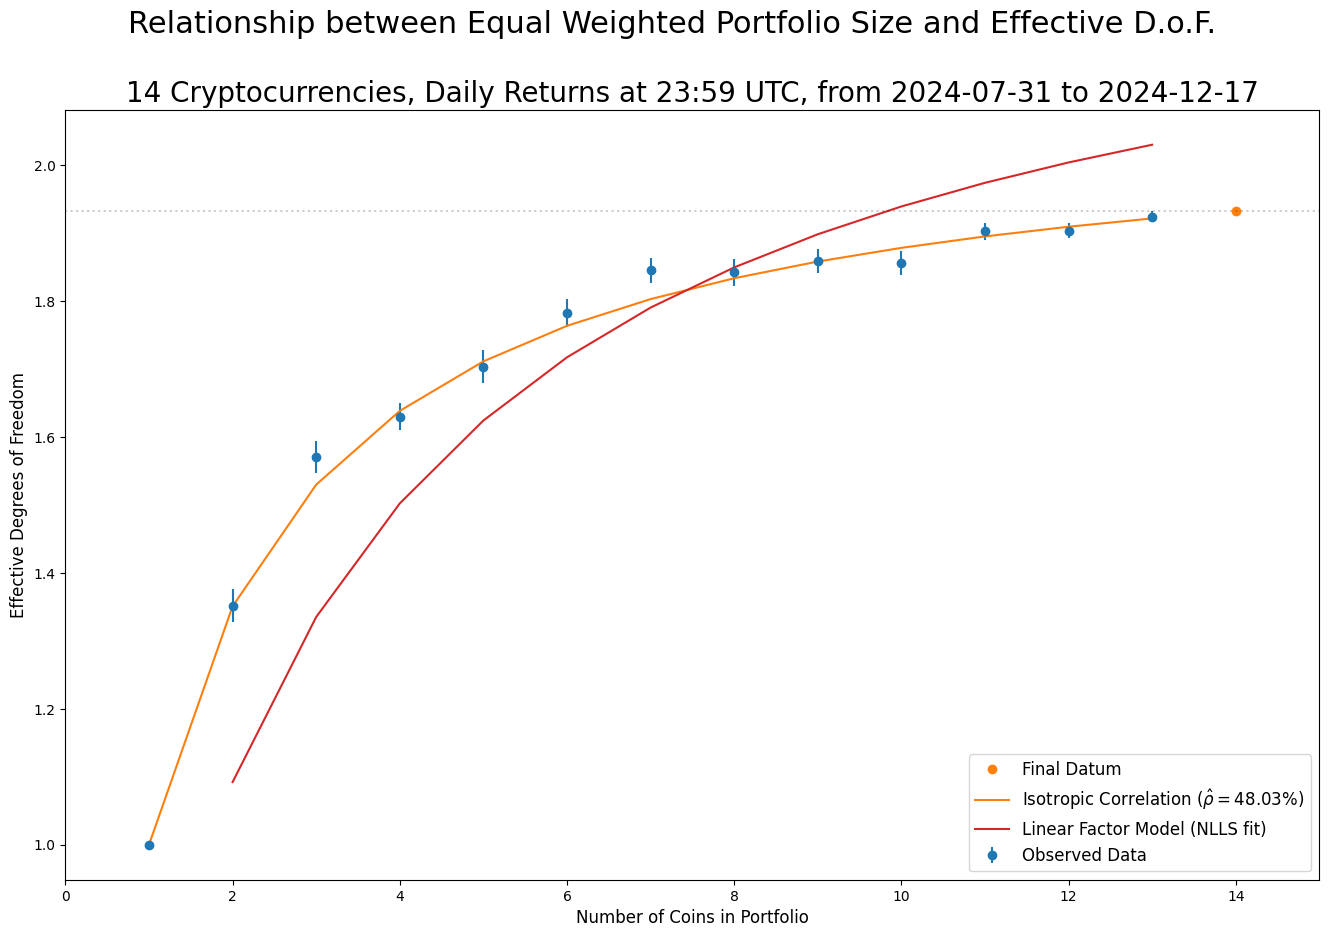

In [10]:
from scipy.stats import chi2,f as fdensity
from scipy.optimize import curve_fit

def nstar(N,*args):
    """Factor model N*(N) function. Parameters are: b2bar, bbar2, s2bar in that order."""
    b2bar,bbar2,s2bar=args
    return N*(b2bar*N+s2bar)/(bbar2*N+s2bar)

meta=pd.DataFrame()
meta[(s:="Sample","Mean")]=(g:=results[(results["Assets"]<=Nmax)][["Assets","Effective D.o.F."]].groupby("Assets")).mean()
meta[(s,"St.Dev.")]=g.std()
meta[(s,"Count")]=g.count()
meta[(s,"Std.Err.")]=meta[(s,"St.Dev.")]/meta[(s,"Count")]**0.5
meta[(l:="Isotropic","Model")]=(x:=meta.index)/(one+(x-one)*rho)
meta[(l,"Error")]=meta[(s,"Mean")]-meta[(l,"Model")]
meta[(l,"Z Score")]=meta[(l,"Error")]/meta[(s,"Std.Err.")]
meta[(l,"Chi Sq.")]=meta[(l,"Z Score")]**2
meta.columns=pd.MultiIndex.from_tuples(list(map(lambda x:x if type(x)==tuple else (x,''),meta.columns)))
nprint("%s Model: Total Chi Squared %g for %d d.o.f., p Value = %g." % (l,sc21:=meta[(l,"Chi Sq.")].sum(),df1:=meta[(l,'Chi Sq.')].count(),chi2(df1).sf(sc21)))

theta,vee=curve_fit(nstar,xf:=meta.index[1:],meta.loc[xf,(s,"Mean")],p0=(one,one,one/hundred),bounds=(zero,np.inf))
sigmas=np.sqrt(np.diag(vee))
nprint("Fitted linear factor model curve via NLLS: b2bar = %g ± %g, bbar2 = %g ± %g, s2bar = %g ± %g. K* = %g" % (theta[0],sigmas[0],theta[1],sigmas[1],theta[2],sigmas[2],theta[0]/theta[1]))
meta[(l:="Factor","Model")]=list(map(lambda q:nstar(q,*theta),meta.index))
meta[(l,"Error")]=meta[(s,"Mean")]-meta[(l,"Model")]
meta[(l,"Z Score")]=(meta[(l,"Error")]/meta[(s,"Std.Err.")]).replace(np.inf,np.nan)
meta[(l,"Chi Sq.")]=meta[(l,"Z Score")]**2
nprint("%s Model: Total Chi Squared %g for %d d.o.f., p Value = %g." % (l,sc22:=meta[(l,"Chi Sq.")].sum(),df2:=meta[(l,'Chi Sq.')].count()-len(theta),chi2(df2).sf(sc22)))

display(meta)
meta.replace(np.nan,"").style.format(precision=3).to_latex(latexfile:=filepath+'meta.tex')
nprint("Wrote meta data to '%s.'" % latexfile)

nprint("F Test for Equivalence of Descriptions: F(%d,%d) = %g, p Value = %g." % (df2,df1,(f:=(sc22/df2)/(sc21/df1)),two*min([fdensity(df2,df1).sf(f),fdensity(df2,df1).cdf(f)])))

figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.errorbar(x=meta.index,y=meta[(s,"Mean")],yerr=meta[(s,"Std.Err.")],fmt='o',label='Observed Data')
plot.plot([Nact],[Nstar],'o',label='Final Datum',color='C1')
plot.plot(x,z:=meta[("Isotropic","Model")],'-',label='Isotropic Correlation ($\\hat{\\rho} = %.2f$%%)' % (rho*hundred),color='C1')
plot.plot(xf,zf:=list(map(lambda q:nstar(q,*theta),xf)),'-',label="Linear Factor Model (NLLS fit)",color='C3')
plot.set_xscale('log' if max(x)>100 else 'linear')
plot.set_xlabel("Number of Coins in Portfolio",fontsize=12)
plot.set_ylabel("Effective Degrees of Freedom",fontsize=12)
figure.suptitle(title,fontsize=22)
plot.set_title(subtitle,fontsize=20)
plot.set_xlim(zero,Nmax+two)
plot.legend(fontsize=12)
plot.axhline(Nstar,color='black',linestyle=':',alpha=0.2)
plot.xaxis.set_major_formatter(CountLabels())
figure.savefig(filepath+title+" 3"+filetype,dpi=300,bbox_inches='tight')

In [11]:
from datetime import timedelta
history,returns=download(list(data)).xs('Adj Close',axis=1,level=0),pd.DataFrame()

for c in history:
    if history[c].last_valid_index()!=history.last_valid_index(): # get rid of tickers that have gone stale (this is COIN as returned by Yahoo)
        history.drop(columns=c,inplace=True)

    else:
        returns[c]=history[c].pct_change(fill_method=None)*hundred
        returns.loc[(f:=returns[c].first_valid_index()):(f+timedelta(days=365)),c]=np.nan # set first year of data to NA to avoid launch spikes

returns.index=pd.DatetimeIndex(returns.index).to_period('D')
returns.dropna(inplace=True,how='all')
returns.drop(returns.index[-1],inplace=True) # remove the final row in case it is not complete
returns=returns[[c for c in returns if c not in (vetoes:=['SHIB-USD','UNI-USD'])]].copy() # dropping SHIB (very low values, precision issue) and UNI (step change in 2022 by orders of magnitude)
nprint("Removed %s entirely!" % ", ".join(vetoes))
returns=returns.copy()
returns['Count']=returns.count(axis=1)
returns=returns[returns['Count']>=five]
returns["Portfolio"]=returns.mean(axis=1)
returns["Year"]=returns.index.year
display(returns)

[*********************100%***********************]  14 of 14 completed

16:23:15 Removed SHIB-USD, UNI-USD entirely!


,AAVE-USD,AVAX-USD,BCH-USD,BTC-USD,DOGE-USD,ETC-USD,ETH-USD,LINK-USD,LTC-USD,XLM-USD,XTZ-USD,Count,Portfolio,Year
Date,,,,,,,,,,,,,,
2018-11-11,NaN,NaN,-4.161377,0.031982,-3.744292,-2.096713,-0.561329,-2.208038,-1.978748,4.737204,0.642718,9,-0.033859,2018
2018-11-12,NaN,NaN,-3.193828,-0.623901,-3.099306,-0.742514,-0.436262,10.431562,-1.395306,-2.294911,-3.804309,9,0.384122,2018
2018-11-13,NaN,NaN,-0.754790,-0.184889,-3.883811,-1.225531,-1.707076,3.312554,-1.878841,-3.568305,-1.776871,9,-0.266756,2018
2018-11-14,NaN,NaN,-14.266303,-9.767137,-8.488966,-12.485053,-12.294876,-5.778568,-12.245908,-9.598618,-10.177453,9,-8.610288,2018
2018-11-15,NaN,NaN,-4.094623,-1.573977,3.896099,-2.833865,-0.325807,-1.133531,0.773886,3.819467,-0.530559,9,0.699709,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-13,2.406450,-0.786786,0.437935,1.415649,0.623055,0.592683,0.723745,-0.897026,4.120039,2.893672,-0.248586,11,1.856736,2024
2024-12-14,-3.200308,-5.443825,-1.471624,-0.085048,-2.714621,-4.338224,-1.094293,0.304403,-4.828682,-3.019081,-4.495992,11,-1.615608,2024
2024-12-15,0.938369,1.849876,2.369619,2.886101,2.084544,3.540658,2.159440,0.381345,2.500002,1.340840,6.596193,11,3.137249,2024


In [12]:
results=pd.DataFrame({"Sample":range(1,(n:=5000)+1),"Assets":[np.nan]*n,"Portfolio":[np.nan]*n,"Coins":[""]*n,"Period":[np.nan]*n}).set_index("Sample") # n is number of trials
nprint("Beginning analysis for {:,d} trials.".format(n))

for i in tqdm(results.index): # for each trial, pick a random sample of stocks with portfolio sizes uniformly distributed between 1 and maximum, one of 2^Nmax-1 choices
    period=generator.choice(returns[p:="Year"].unique(),1)[0]
    subset=returns[returns[p]==period][generator.choice(a:=[c for c in returns.columns if '-' in c],generator.integers(1,len(a)+1),replace=False)].copy()
    subset.dropna(inplace=True)
    results.loc[i,"Coins"]=",".join(sorted(map(lambda x:x.split('-')[0],subset.columns))) # list of coins in portfolio
    subset['Portfolio']=subset.mean(axis=1) # equal weighted portfolio return
    results.loc[i,"Assets"]=subset.shape[1]-1 # number of assets we ended up with
    results.loc[i,"Independent"]=subset[[c for c in subset if '-' in c]].var().sum()/results.loc[i,"Assets"]**2 # if no correlation, portfolio variance is total variance divided by square of number of assets
    results.loc[i,"Portfolio"]=subset['Portfolio'].var() # variance of portfolio returns for same period as individual returns
    results.loc[i,"Period"]=period

results.dropna(inplace=True)
results.drop_duplicates(inplace=True)
results["Effective D.o.F."]=results["Independent"]/results["Portfolio"]*results["Assets"]
display(results)
nprint("Done.")

16:23:15 Beginning analysis for 5,000 trials.


  0%|          | 0/5000 [00:00<?, ?it/s]

,Assets,Portfolio,Coins,Period,Independent,Effective D.o.F.
Sample,,,,,,
4,5.0,18.117257,"AVAX,BTC,ETC,ETH,LINK",2021.0,5.895516,1.627044
6,8.0,7.110807,"AAVE,AVAX,BTC,DOGE,ETC,ETH,XLM,XTZ",2023.0,1.517834,1.707636
7,11.0,13.966500,"AAVE,AVAX,BCH,BTC,DOGE,ETC,ETH,LINK,LTC,XLM,XTZ",2021.0,2.154150,1.696606
8,7.0,11.843058,"AVAX,BCH,BTC,ETC,ETH,LINK,LTC",2024.0,2.600897,1.537295
10,4.0,8.501193,"AAVE,BCH,DOGE,XLM",2023.0,3.863361,1.817797
...,...,...,...,...,...,...
4991,8.0,13.233130,"AAVE,AVAX,BCH,BTC,DOGE,ETC,ETH,LINK",2024.0,2.612171,1.579171
4994,5.0,18.131081,"AVAX,BCH,LTC,XLM,XTZ",2022.0,4.447364,1.226448
4996,6.0,7.816453,"AAVE,BCH,BTC,LINK,LTC,XLM",2023.0,2.306045,1.770147


16:23:53 Done.


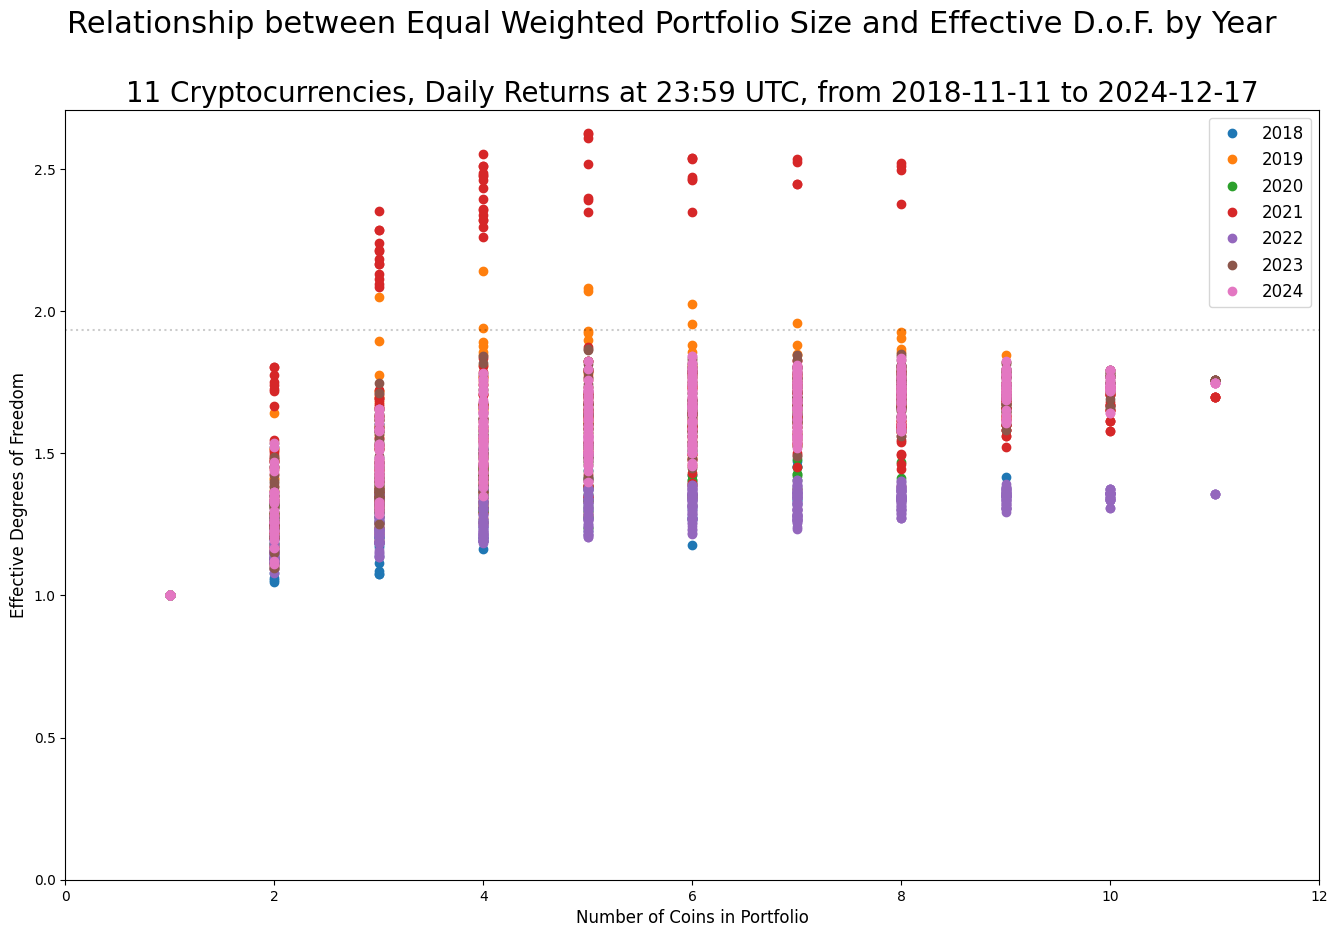

In [13]:
figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
Nmax=results["Assets"].max()-one

for period in sorted(results["Period"].unique()):
    plot.plot(x:=results[select:=results["Period"]==period]["Assets"].to_numpy(),y:=results[select]["Effective D.o.F."].to_numpy(),'o',label=int(period))

plot.set_xscale('log' if max(x)>100 else 'linear')
plot.set_ylim(zero,None)
plot.set_xlabel("Number of Coins in Portfolio",fontsize=12)
plot.set_ylabel("Effective Degrees of Freedom",fontsize=12)
figure.suptitle(title:="Relationship between Equal Weighted Portfolio Size and Effective D.o.F. by Year",fontsize=22)
plot.set_title(subtitle:="%d Cryptocurrencies, Daily Returns at 23:59 UTC, from %s to %s" % (len(a),returns.index[0],returns.index[-1]),fontsize=20)
plot.set_xlim(zero,Nmax+two)
plot.legend(fontsize=12)
plot.axhline(Nstar,color='black',linestyle=':',alpha=0.2)
plot.xaxis.set_major_formatter(CountLabels())
figure.savefig(filepath+title+filetype,dpi=300,bbox_inches='tight')

,AAVE-USD,AVAX-USD,BCH-USD,BTC-USD,DOGE-USD,ETC-USD,ETH-USD,LINK-USD,LTC-USD,XLM-USD,XTZ-USD,Portfolio,Assets,Independent,Effective D.o.F.,Imputed Correlation
Year,,,,,,,,,,,,,,,,
2018,NaN,NaN,138.100860,25.599532,22.740650,50.768403,48.368609,69.624589,39.790087,41.815496,50.243165,30.908678,10,4.870514,1.575776,59.400905
2019,NaN,NaN,28.684996,12.690500,11.798156,19.125543,16.915673,48.141735,23.726669,18.438624,33.475413,10.387239,10,2.129973,2.050567,43.074443
2020,NaN,NaN,29.951167,14.219099,28.864247,27.412591,24.391541,44.235523,26.028220,37.074306,35.577777,16.649036,10,2.677545,1.608228,57.978037
2021,26.338886,64.152351,48.766624,17.715785,486.126192,65.957318,31.357507,53.562107,37.260494,54.787837,60.438949,31.808283,12,6.572667,2.479606,34.904354
2022,40.176555,32.575116,19.110765,11.061469,31.665288,36.796413,20.448674,26.495531,20.252314,16.127458,23.118447,15.636538,12,1.929361,1.480656,64.586499
2023,14.929209,19.360389,17.632938,5.247752,10.643087,11.242495,5.976481,14.988606,11.610572,18.608535,11.133410,6.137769,12,0.981760,1.919447,47.743635
2024,25.816880,24.152805,28.140457,7.907856,29.121851,18.272661,11.624049,22.142394,15.203710,30.072472,25.481742,10.400429,12,1.652339,1.906467,48.130600


16:23:54 Wrote variances to '/content/drive/MyDrive/variances.tex.'


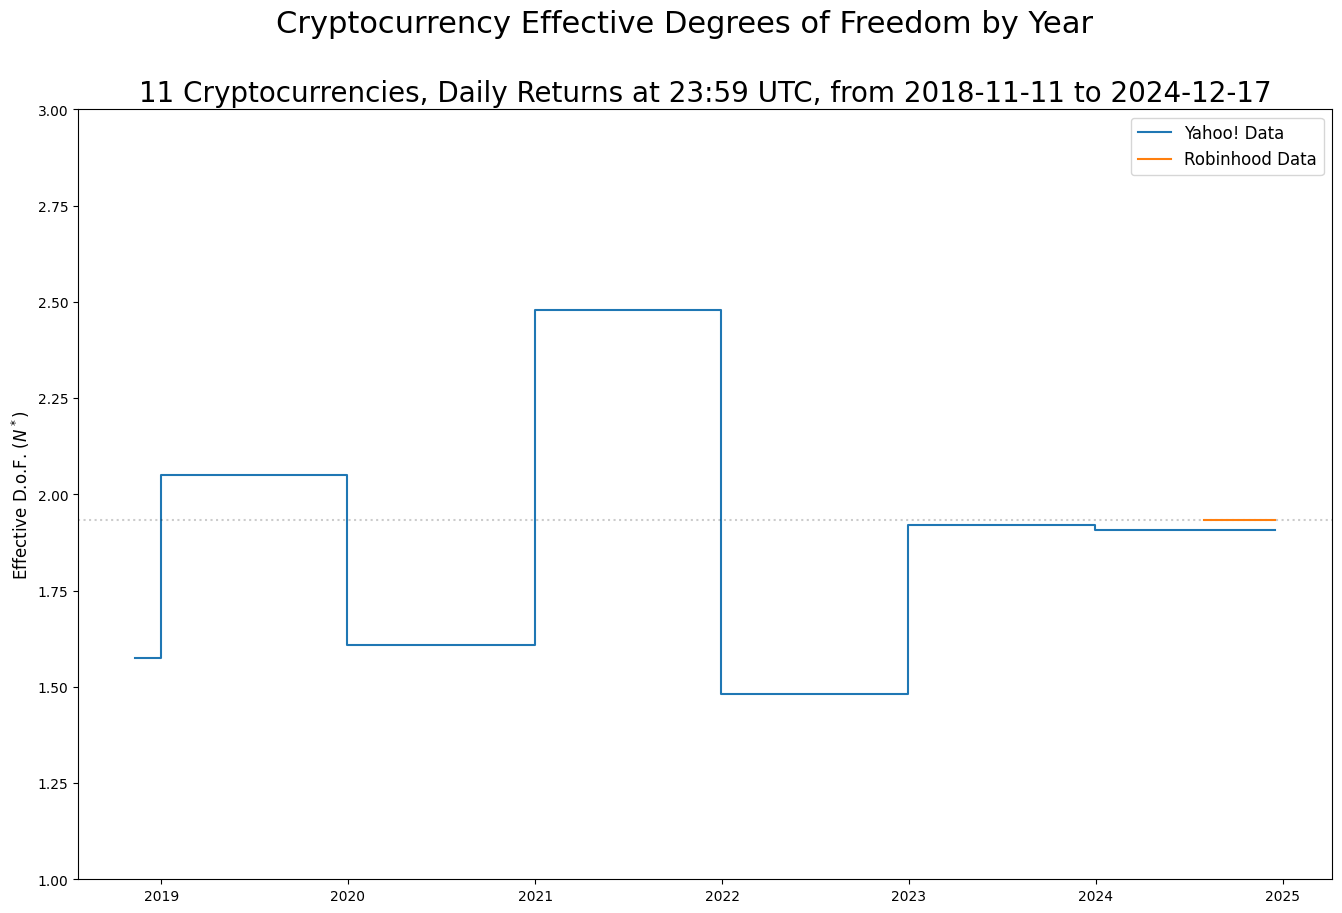

In [14]:
variances=returns[[c for c in returns if '-' in c or c in ('Portfolio','Year')]].groupby('Year').var()
variances["Assets"]=variances.count(axis=1)
variances["Independent"]=variances[[c for c in variances if '-' in c]].sum(axis=1)/variances["Assets"]**2
variances[ns:="Effective D.o.F."]=variances["Independent"]/variances["Portfolio"]*variances[na:="Assets"]
variances[nr:="Imputed Correlation"]=(variances[na]-variances[ns])/((variances[na]-one)*variances[ns])*hundred
display(variances)
variances.replace(np.nan,"").T.style.format(precision=2).to_latex(latexfile:=filepath+'variances.tex')
nprint("Wrote variances to '%s.'" % latexfile)

figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.step(x:=list(map(lambda x:pd.to_datetime(str(x)),[returns.index[0]]+list(map(lambda x:pd.Period(datetime(x,12,31),'D') if x<data.index[-1].year else data.index[-1],variances.index)))),
          y:=np.insert(variances[ns].to_numpy(),0,variances[ns].iloc[0]),'-',where='pre',label='Yahoo! Data') # the code to make x here is heinous, and that is due to Pandas
plot.set_ylabel("Effective D.o.F. ($N^*$)",fontsize=12)
plot.set_ylim(one,three)
plot.axhline(Nstar,color='black',linestyle=':',alpha=0.2)
plot.plot(x:=data.index[[0,-1]],y:=[Nstar]*len(x),'-',color='C1',label='Robinhood Data')
plot.legend(fontsize=12)
figure.suptitle(title:="Cryptocurrency Effective Degrees of Freedom by Year",fontsize=22)
plot.set_title(subtitle,fontsize=20)
figure.savefig(filepath+title+filetype,dpi=300,bbox_inches='tight')